<a href="https://colab.research.google.com/github/surajdusa/Predictive-Modelling-of-Energy-Usage-in-Response-to-Dynamic-Pricing-Signals-in-London-Households/blob/main/prepro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CC_LCL-FullData.csv')

In [4]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [5]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 167932474


In [6]:
print('The number of data points in the dataset:', df.shape[1])

The number of data points in the dataset: 4


In [7]:
df = df.iloc[:2000000]

In [8]:
print(df.isnull().sum())

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [9]:
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Time"] = pd.to_datetime(df["DateTime"]).dt.time
df.drop(columns=["DateTime"], inplace=True)

In [10]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 2000000


In [11]:
df.head()

,LCLid,stdorToU,KWH/hh (per half hour),Date,Time
0,MAC000002,Std,0,2012-10-12,00:30:00
1,MAC000002,Std,0,2012-10-12,01:00:00
2,MAC000002,Std,0,2012-10-12,01:30:00
3,MAC000002,Std,0,2012-10-12,02:00:00
4,MAC000002,Std,0,2012-10-12,02:30:00


In [12]:
print(df.columns.tolist())

['LCLid', 'stdorToU', 'KWH/hh (per half hour) ', 'Date', 'Time']


In [13]:
df.columns = df.columns.str.strip()

In [14]:
df["KWH/hh (per half hour)"] = pd.to_numeric(df["KWH/hh (per half hour)"], errors="coerce")

In [15]:
dx = df.groupby("Date")["KWH/hh (per half hour)"].sum().reset_index()
dx.columns = ["Date", "KWH"]

In [16]:
dx.head(20)

,Date,KWH
0,2011-12-06,2.947000
1,2011-12-07,143.174000
2,2011-12-08,365.577000
3,2011-12-09,502.532000
4,2011-12-10,637.385000
5,2011-12-11,670.710001
6,2011-12-12,614.313000
7,2011-12-13,570.259000
8,2011-12-14,627.398000
9,2011-12-15,643.423001


In [17]:
dx['Date'] = pd.to_datetime(dx['Date'], errors='coerce')

In [18]:
dx['year'] = dx['Date'].dt.year
dx['quarter'] = dx['Date'].dt.quarter
dx['month'] = dx['Date'].dt.month
dx['day'] = dx['Date'].dt.day

In [19]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,12,6
1,2011-12-07,143.174,2011,4,12,7
2,2011-12-08,365.577,2011,4,12,8
3,2011-12-09,502.532,2011,4,12,9
4,2011-12-10,637.385,2011,4,12,10


In [20]:
import calendar
dx['month'] = dx['month'].apply(lambda x: calendar.month_name[x])

In [21]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,December,6
1,2011-12-07,143.174,2011,4,December,7
2,2011-12-08,365.577,2011,4,December,8
3,2011-12-09,502.532,2011,4,December,9
4,2011-12-10,637.385,2011,4,December,10


In [22]:
dx.tail()

,Date,KWH,year,quarter,month,day
811,2014-02-24,620.515001,2014,1,February,24
812,2014-02-25,575.761001,2014,1,February,25
813,2014-02-26,602.744000,2014,1,February,26
814,2014-02-27,605.165001,2014,1,February,27
815,2014-02-28,41.394000,2014,1,February,28


In [23]:
dx.KWH.describe()

,KWH
count,816.000000
mean,586.107567
std,125.938950
min,2.947000
25%,482.893750
50%,564.665500
75%,668.310750
max,942.200000


In [24]:
table = PrettyTable()
table.field_names = ["Year", "Average Price (GBP per kWh)"]
data = [[2011, 0.1446], [2012, 0.1532], [2013, 0.1596], [2014, 0.1653]]

for year, price in data:
    table.add_row([year, price])
print(table)

+------+-----------------------------+
| Year | Average Price (GBP per kWh) |
+------+-----------------------------+
| 2011 |            0.1446           |
| 2012 |            0.1532           |
| 2013 |            0.1596           |
| 2014 |            0.1653           |
+------+-----------------------------+


In [25]:
average_prices = {2011: 0.1446,  2012: 0.1532, 2013: 0.1596, 2014: 0.1653}

dx['Price (GBP per kWh)'] = dx['year'].map(average_prices)
dx['Total Cost (GBP)'] = dx['KWH'].round(1) * dx['Price (GBP per kWh)'].round(2)

In [26]:
dx.sample(20)

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP)
643,2013-09-09,497.122000,2013,3,September,9,0.1596,79.536
366,2012-12-06,818.571001,2012,4,December,6,0.1532,122.790
707,2013-11-12,565.236000,2013,4,November,12,0.1596,90.432
420,2013-01-29,711.819000,2013,1,January,29,0.1596,113.888
308,2012-10-09,522.983999,2012,4,October,9,0.1532,78.450
99,2012-03-14,578.917999,2012,1,March,14,0.1532,86.835
809,2014-02-22,593.764999,2014,1,February,22,0.1653,100.946
480,2013-03-30,778.925001,2013,1,March,30,0.1596,124.624
361,2012-12-01,787.268000,2012,4,December,1,0.1532,118.095
497,2013-04-16,549.821999,2013,2,April,16,0.1596,87.968


In [27]:
dx['Total Cost (GBP)'].describe()

,Total Cost (GBP)
count,816.000000
mean,91.331045
std,20.604329
min,0.406000
25%,74.848000
50%,86.670000
75%,106.892500
max,150.752000


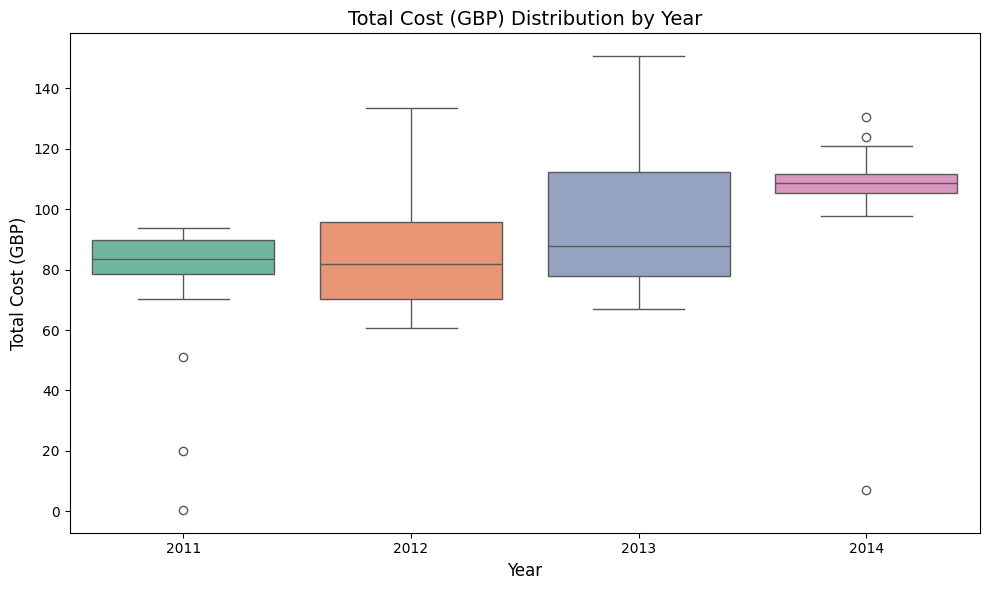

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Total Cost (GBP)', data=dx, palette='Set2')
plt.title("Total Cost (GBP) Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cost (GBP)", fontsize=12)
plt.tight_layout()
plt.show()

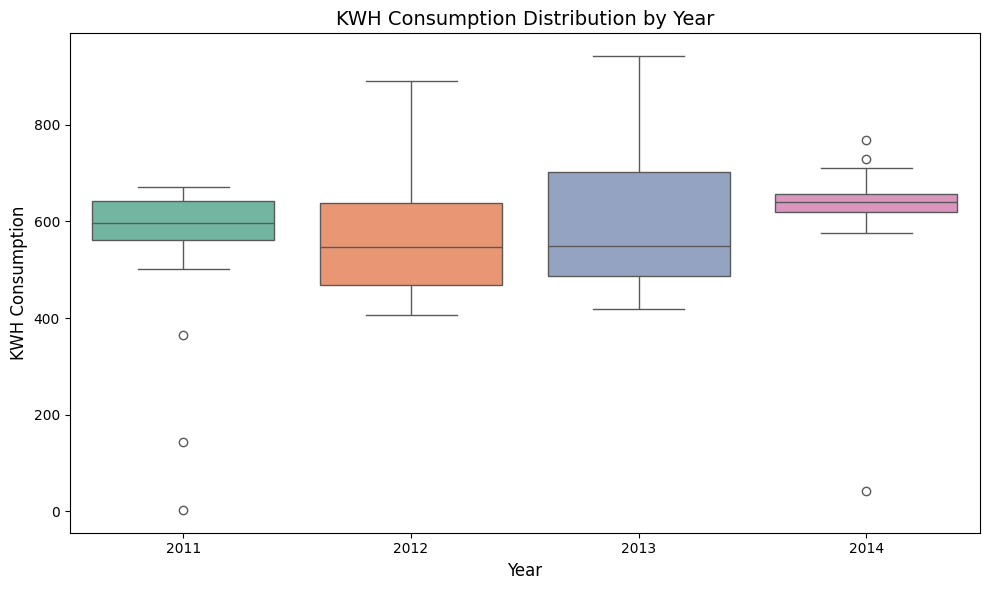

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
Q1 = dx['KWH'].quantile(0.25)
Q3 = dx['KWH'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dx = dx[(dx['KWH'] >= lower_bound) & (dx['KWH'] <= upper_bound)]

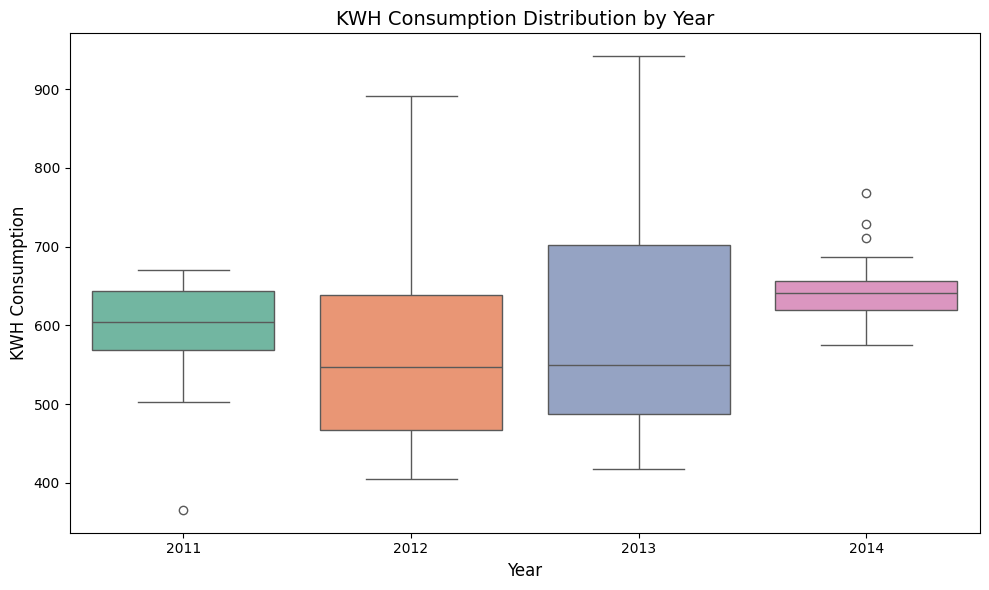

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
dx.head()

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP)
2,2011-12-08,365.577000,2011,4,December,8,0.1446,51.184
3,2011-12-09,502.532000,2011,4,December,9,0.1446,70.350
4,2011-12-10,637.385000,2011,4,December,10,0.1446,89.236
5,2011-12-11,670.710001,2011,4,December,11,0.1446,93.898
6,2011-12-12,614.313000,2011,4,December,12,0.1446,86.002


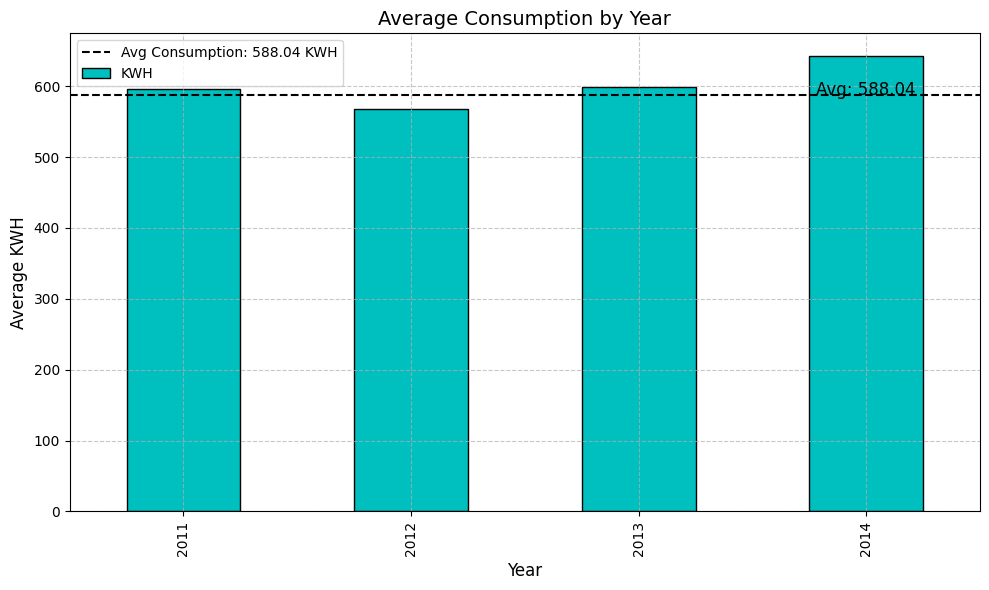

In [33]:
yearly_avg = dx.groupby('year')['KWH'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='c', edgecolor='black')
overall_avg = dx['KWH'].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.text(len(yearly_avg) - 1, overall_avg + 0.05, f"Avg: {overall_avg:.2f}", color='black', fontsize=12, ha='center')
plt.title("Average Consumption by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

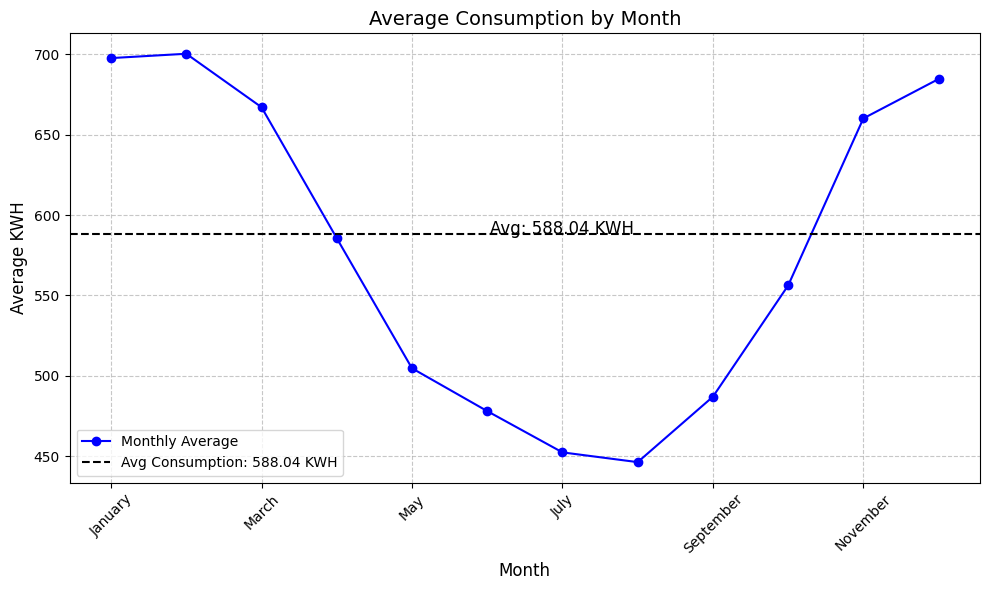

In [34]:
month_order = list(calendar.month_name)[1:]
dx['month'] = pd.Categorical(dx['month'], categories=month_order, ordered=True)

overall_avg = dx["KWH"].mean()
monthly_avg = dx.groupby('month')['KWH'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='b', label='Monthly Average')
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.title("Average Consumption by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.text(6, overall_avg + 0.05, f"Avg: {overall_avg:.2f} KWH", color='black', fontsize=12, ha='center')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
print('Minimum date:', dx.Date.min())
print('Maximum date:', dx.Date.max())

Minimum date: 2011-12-08 00:00:00
Maximum date: 2014-02-27 00:00:00


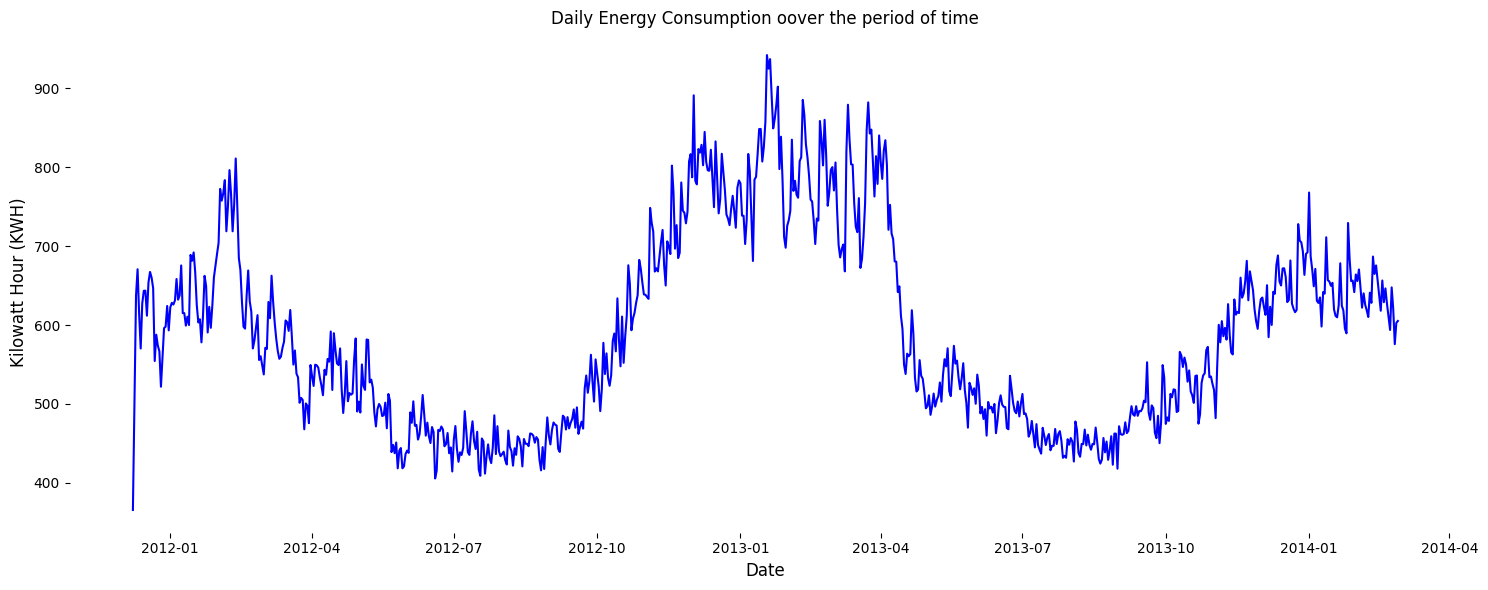

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(dx['Date'], dx['KWH'], color='blue')
plt.ylabel('Kilowatt Hour (KWH)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Energy Consumption oover the period of time')
plt.tight_layout()
sns.despine(bottom=True, left=True)
plt.show()